# Intro to Machine Learning (feat. Tensorflow)

2017.4.13
Dongwoo 화목회

Machine learning is the subfield of computer science that gives computers the ability to learn without being explicitly programmed.

## Supervised vs Unsupervised ( vs reinforcement )
- supervised
    - Regression problem
    - Classification problem
- unsupervised
    - Clustering
- reinforecement

## Tensorflow
Tensorflow is an open-source software library for Machine Intelligence. It was developed by Google to meet their needs for systems capable of building and training neural networks.

## Before Start..
### Hypothesis
H(x) = Wx + b에서 Wx + b는 x에 대한 1차 방적식으로 직선을 표현한다. 기울기에 해당하는 W(Weight)와 절편에 해당하는 b(bias)가 반복되는 과정에서 계속 바뀌고, 마지막 루프에서 바뀐 최종 값을 사용해서 데이터 예측(prediction)에 사용하게 된다. 최종 결과로 나온 가설을 모델(model)이라고 부르고, "학습되었다"라고 한다.
![title](hypothesis.png)


### Cost function
앞에서 설명한 Hypothesis 방정식에 대한 비용(cost)으로 방정식의 결과가 크게 나오면 좋지 않다고 얘기하고, 루프를 돌 때마다 W와 b를 비용이 적게 발생하는 방향으로 수정하게 된다.
![title](cost_function.png)

### Goal : Minimize cost!!
목표는 cost를 최소로 만드는 W(기울기)와 b(절편)를 찾는 것

## Linear Regression
2차원 좌표에 분포된 데이터를 1차원 직선 방정식을 통해 표현되지 않은 데이터를 예측하기 위한 분석 모델

### Gradient descent algorithm

![title](linear1.png)

![title](linear2.png)

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]

# range is -100 ~ 100
W = tf.Variable(tf.random_uniform([1], -100., 100.))
b = tf.Variable(tf.random_uniform([1], -100., 100.))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(2001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))

print(sess.run(hypothesis, feed_dict={X: 5}))           # [ 10.]
print(sess.run(hypothesis, feed_dict={X: 2.5}))         # [5.]

0 14835.4 [ 4.26644135] [-127.44038391]
200 0.0115647 [ 2.08950067] [-0.26314303]
400 6.05876e-08 [ 2.0002048] [-0.00060249]
600 4.83169e-13 [ 2.00000048] [ -1.61335504e-06]
800 1.03029e-13 [ 2.00000024] [ -6.00076135e-07]
1000 1.03029e-13 [ 2.00000024] [ -6.00076135e-07]
1200 1.03029e-13 [ 2.00000024] [ -6.00076135e-07]
1400 1.03029e-13 [ 2.00000024] [ -6.00076135e-07]
1600 1.03029e-13 [ 2.00000024] [ -6.00076135e-07]
1800 1.03029e-13 [ 2.00000024] [ -6.00076135e-07]
2000 1.03029e-13 [ 2.00000024] [ -6.00076135e-07]
[ 10.]
[ 5.]


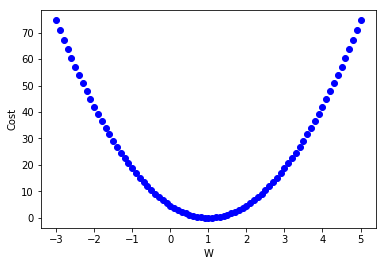

In [18]:
X = [1., 2., 3.]
Y = [1., 2., 3.]
m = len(X)

W = tf.placeholder(tf.float32)

hypothesis = tf.multiply(W, X)
cost = tf.reduce_sum(tf.pow(hypothesis-Y, 2)) / m

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

# 그래프로 표시하기 위해 데이터를 누적할 리스트
W_val, cost_val = [], []

# 0.1 단위로 증가할 수 없어서 -30부터 시작. 그래프에는 -3에서 5까지 표시됨.
for i in range(-30, 51):
    xPos = i*0.1                                    # x 좌표. -3에서 5까지 0.1씩 증가
    yPos = sess.run(cost, feed_dict={W: xPos})      # x 좌표에 따른 y 값

#     print('{:3.1f}, {:3.1f}'.format(xPos, yPos))

    # 그래프에 표시할 데이터 누적. 단순히 리스트에 갯수를 늘려나감
    W_val.append(xPos)
    cost_val.append(yPos)

sess.close()


plt.plot(W_val, cost_val, 'bo')
plt.ylabel('Cost')
plt.xlabel('W')
plt.show()

## Logistic Classification
Linear Regression을 활용해서 데이터를 분류하는 모델

### Sigmoid

![title](sigmoid.png)

### New cost function

![title](cost_function2.png)

### Gradient decent algorithm

![title](gradient.png)

In [25]:
import numpy as np

In [26]:
# 04train.txt
# #x0 x1 x2 y
# 1   2   1   0
# 1   3   2   0
# 1   3   5   0
# 1   5   5   1
# 1   7   5   1
# 1   2   5   1

# 원본 파일은 6행 4열이지만, 열 우선이라서 4행 6열로 가져옴
xy = np.loadtxt('04train.txt', unpack=True, dtype='float32')

# print(xy[0], xy[-1])        # [ 1.  1.  1.  1.  1.  1.] [ 0.  0.  0.  1.  1.  1.]

x_data = xy[:-1]            # 3행 6열
y_data = xy[-1]             # 1행 6열

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# feature별 가중치를 난수로 초기화. feature는 bias 포함해서 3개. 1행 3열.
W = tf.Variable(tf.random_uniform([1, len(x_data)], -1.0, 1.0))

# 행렬 곱셈. (1x3) * (3x6)
h = tf.matmul(W, X)
hypothesis = tf.div(1., 1. + tf.exp(-h))    # exp(-h) = e ** -h. e는 자연상수

# exp()에는 실수만 전달
# print(tf.exp([1., 2., 3.]).eval())      # [2.71828175 7.38905621 20.08553696]
# print(tf.exp([-1., -2., -3.]).eval())   # [0.36787945 0.13533528 0.04978707]

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(2001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

print('-----------------------------------------')

# 결과가 0 또는 1로 계산되는 것이 아니라 0과 1 사이의 값으로 나오기 때문에 True/False는 직접 판단
print('[1, 2, 2] :', sess.run(hypothesis, feed_dict={X: [[1], [2], [2]]}) > 0.5)
print('[1, 5, 5] :', sess.run(hypothesis, feed_dict={X: [[1], [5], [5]]}) > 0.5)
# print('[1, 4, 2] [1, 0, 10] :', end=' ')
# print(sess.run(hypothesis, feed_dict={X: [[1, 1], [4, 0], [2, 10]]}) > 0.5)
sess.close()


0 0.696679 [[-0.60778683 -0.5672698   0.7743457 ]]
200 0.452224 [[-2.18480587  0.19798084  0.44790182]]
400 0.403514 [[-3.15173864  0.2891522   0.58462542]]
600 0.379679 [[-3.82983804  0.34570488  0.68624336]]
800 0.365946 [[-4.34512854  0.38417068  0.76662159]]
1000 0.357157 [[-4.75758123  0.41195104  0.83295226]]
1200 0.351109 [[-5.09976816  0.43290541  0.8893199 ]]
1400 0.346723 [[-5.39117146  0.44923964  0.93826234]]
1600 0.343414 [[-5.64430857  0.4623062   0.98146325]]
1800 0.340837 [[-5.86765385  0.47297916  1.02009511]]
2000 0.33878 [[-6.06720448  0.48184928  1.05500722]]
-----------------------------------------
[1, 2, 2] : [[False]]
[1, 5, 5] : [[ True]]


## Deep Learning